# 1. Logistic Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
LEARNING_RATE = 0.001
NUM_STEPS = 100000

data = np.loadtxt('./ex2/ex2data1.txt', delimiter=',')
x_data = data[:, :-1] # 100 x 2
y_data = np.reshape(data[:, -1], [-1, 1]) # 100 x 1

X = tf.placeholder(dtype=tf.float32, shape=[None, 2])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

W = tf.Variable(tf.zeros([2, 1]))
B = tf.Variable(tf.zeros([1, 1]))

pred = tf.sigmoid(tf.matmul(X, W) + B)
#pred = tf.div(1., 1.+tf.exp(-(tf.matmul(X, W) + B)))
loss = -tf.reduce_mean(Y * tf.log(pred) + (1-Y) * tf.log(1 - pred))
#loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print("Initial Loss: "+str(sess.run(loss, feed_dict={X: x_data, Y: y_data})))

for step in range(NUM_STEPS):
    sess.run(train, feed_dict={X: x_data, Y: y_data})

w, b = sess.run([W, B], feed_dict={X: x_data, Y: y_data})
print("Final Loss: "+str(sess.run(loss, feed_dict={X: x_data, Y: y_data})))   

Initial Loss: 0.6931474
Final Loss: 0.38739312


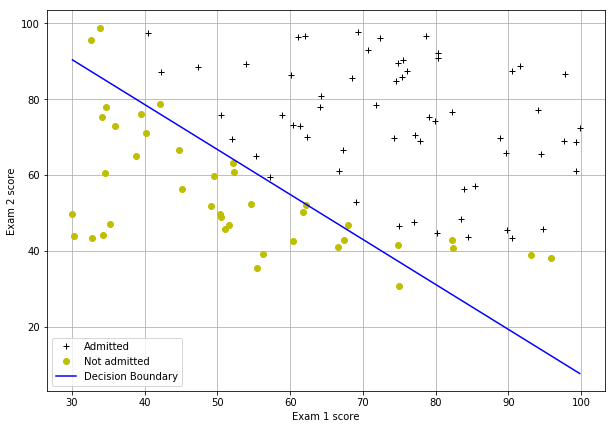

In [3]:
def plotData():

    pos = np.array([list(x_data[i]) for i in range(len(y_data)) if y_data[i][0] == 1])
    neg = np.array([list(x_data[i]) for i in range(len(y_data)) if y_data[i][0] == 0])
    
    plt.figure(figsize=(10,7))
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label='Admitted') # black plus
    plt.plot(neg[:, 0], neg[:, 1], 'yo', label='Not admitted') # yellow circle
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend() # Admitted or Not admitted
    plt.grid(True)

xs = np.array([np.min(x_data[:,0]), np.max(x_data[:,0])])
ys = (-1/w[1][0]) * (w[0][0] * xs + b[0][0]) # x2 = -(w1 * x1 + b) / w2

plotData()
plt.plot(xs, ys,'b-',label='Decision Boundary')
plt.legend()    
    

# 2. Regularized Logistic Regression

In [4]:
def plotData():

    pos = np.array([list(x_data[i]) for i in range(len(y_data)) if y_data[i][0] == 1])
    neg = np.array([list(x_data[i]) for i in range(len(y_data)) if y_data[i][0] == 0])
    
    plt.figure(figsize=(10,7))
    plt.plot(pos[:, 0], pos[:, 1], 'k+', label='y = 1') # black plus
    plt.plot(neg[:, 0], neg[:, 1], 'yo', label='y = 0') # yellow circle
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

def mapFeature(x1, x2):
    degree = 6
    output = []

    for i in range(1, degree+1):
        for j in range(0, i+1): # 1 => (0, 1), 2 => (0, 1, 2) ... 6 => (0, 1 ..., 6)
            temp1 = x1 ** (i-j)
            temp2 = x2 ** i
            temp = temp1*temp2 # (118, )
            output.append(temp)
    
    mapX = np.transpose(output) # (118, 27)
    return mapX

data = np.loadtxt('./ex2/ex2data2.txt', delimiter=',')
x_data = data[:, :-1] # 118 x 2
y_data = np.reshape(data[:, -1], [-1, 1])

map_x = mapFeature(x_data[:, 0], x_data[:, 1]) # (118, 27)
map_y = np.reshape(data[:, -1], [-1, 1]) # (118, 1)
map_w = np.zeros([len(map_x[0]), 1]) # (27, 1)
map_b = np.zeros(([1,1])) # (1, 1)

m = len(map_x)
n = len(map_x[0])

LEARNING_RATE = 10
NUM_STEPS = 100000
LAMBDA = 0

X = tf.placeholder(dtype=tf.float32, shape=[None, 27])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

W = tf.Variable(tf.zeros([27, 1]))
B = tf.Variable(tf.zeros([1, 1]))

pred = tf.sigmoid(tf.matmul(X, W) + B)
#pred = tf.div(1., 1.+tf.exp(-(tf.matmul(X, W) + B)))

val_loss = -tf.reduce_mean(Y * tf.log(pred) + (1-Y) * tf.log(1 - pred))
#val_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=pred, labels=Y))

L2_loss = (LAMBDA/2*m) * tf.nn.l2_loss(W)
loss = val_loss + L2_loss

optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print("Initial Loss: "+str(sess.run(loss, feed_dict={X: map_x, Y: map_y})))

for step in range(NUM_STEPS):
    sess.run(train, feed_dict={X: map_x, Y: map_y})

w, b = sess.run([W, B], feed_dict={X: map_x, Y: map_y})
print("Final Loss: "+str(sess.run(loss, feed_dict={X: map_x, Y: map_y})))   



Initial Loss: 0.6931474
Final Loss: 0.36842597


Text(0.5,1,'Decision Boundary')

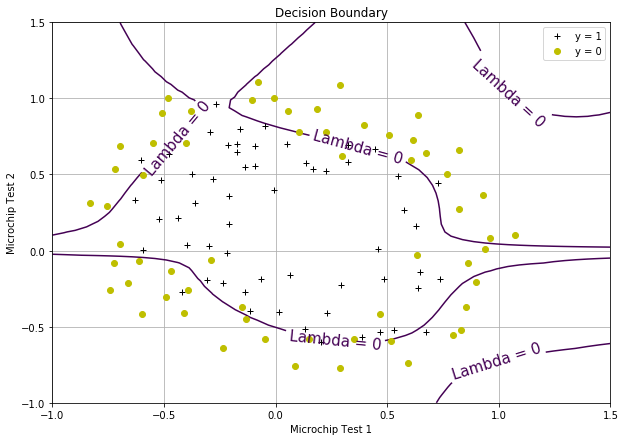

In [5]:
plotData()

xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))

for i in range(len(xvals)):
    for j in range(len(yvals)):
        myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
        zvals[i][j] = np.matmul(myfeaturesij, w) + b
        
zvals = zvals.transpose()
u, v = np.meshgrid( xvals, yvals )
mycontour = plt.contour( xvals, yvals, zvals, [0])
#Kind of a hacky way to display a text on top of the decision boundary
myfmt = { 0:'Lambda = 0'}
plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
plt.title("Decision Boundary")